Proovime kui hästi OpenCV "haarcascade_frontalface_default.xml" klassifitseerija meie genereeritud piltidega hakkama saab.

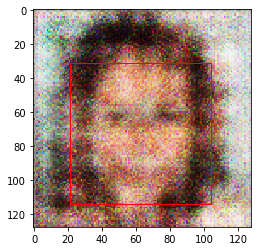

OpenCV haarcascade found faces in epoch 0: 9/11
OpenCV haarcascade found faces in epoch 1: 8/11
OpenCV haarcascade found faces in epoch 2: 0/0


In [86]:
from cv2 import imread
from cv2 import CascadeClassifier
from cv2 import rectangle
from cv2 import imshow
import os
import matplotlib.pyplot as plt


pic = imread('proov1.png')
for_plt = plt.imread('proov1.png')
cls = CascadeClassifier('haarcascade_frontalface_default.xml')
bboxes, rejectlvls, weights = cls.detectMultiScale3(pic, 1.1, 5, outputRejectLevels=True)

plt.imshow(for_plt)
ax = pyplot.gca()
for box in bboxes:
    x, y, width, height = box
    rect = Rectangle((x, y), width, height, fill=False, color='red')
    ax.add_patch(rect)
plt.show()


face_found = {'0': 0, '1': 0, '2': 0}
total_imgs = {'0': 0, '1': 0, '2': 0}
for filename in os.listdir('samples'):
    if filename.endswith(".png") or filename.endswith(".jpeg") or filename.endswith(".jpg"):
        pic = imread('samples/' + filename)
        epoch = filename.split("_")[1].split(".")[0]
        bboxes, rejectlvls, weights = cls.detectMultiScale3(pic, 1.1, 5, outputRejectLevels=True)
        if len(bboxes) > 0:
            face_found[epoch] += 1
        total_imgs[epoch] += 1
for k in face_found.keys():
    print("OpenCV haarcascade found faces in epoch", str(k) + ":", str(face_found[k]) + "/" + str(total_imgs[k]))


Proovime kui hästi MTCNN närvivõrk meie genereeritud piltidega hakkama saab.

In [13]:
!pip install mtcnn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


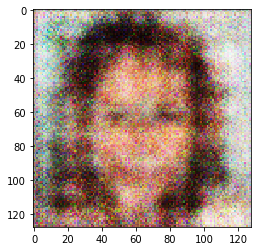

OpenCV haarcascade found faces in epoch 0: 1/11
OpenCV haarcascade found faces in epoch 1: 3/11
OpenCV haarcascade found faces in epoch 2: 0/0


In [87]:
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from mtcnn.mtcnn import MTCNN

def draw_image_with_boxes(filename, result_list):
	data = pyplot.imread(filename)
	pyplot.imshow(data)
	ax = pyplot.gca()
	for result in result_list:
		x, y, width, height = result['box']
		rect = Rectangle((x, y), width, height, fill=False, color='red')
		ax.add_patch(rect)
	pyplot.show()

filename = 'proov1.png'
pic = pyplot.imread(filename)
detector = MTCNN()
faces = detector.detect_faces(pic)
draw_image_with_boxes(filename, faces)

face_found = {'0': 0, '1': 0, '2': 0}
total_imgs = {'0': 0, '1': 0, '2': 0}
for filename in os.listdir('samples'):
    if filename.endswith(".png") or filename.endswith(".jpeg") or filename.endswith(".jpg"):
        pic = imread('samples/' + filename)
        faces = detector.detect_faces(pic)
        epoch = filename.split("_")[1].split(".")[0]
        if len(faces) > 0:
            face_found[epoch] += 1
        total_imgs[epoch] += 1
for k in face_found.keys():
    print("OpenCV haarcascade found faces in epoch", str(k) + ":", str(face_found[k]) + "/" + str(total_imgs[k]))

Proovime enda tehtud CNN-ga, mis on treenitud 25000 celebrity näoga ja 25000 suvalise muu pildiga cifar10 datasetist

In [76]:
from keras.layers import Input, Conv2D, Activation, Flatten, Dense, MaxPooling2D, BatchNormalization, Dropout
from keras import regularizers
from keras import optimizers
from keras import Sequential

dropout_rate = 0.25
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(dropout_rate))

model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(dropout_rate))

model.add(Conv2D(128, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(dropout_rate))

model.add(Dense(100, activation='relu'))
model.add(Dropout(dropout_rate))

model.add(Flatten())
model.add(Dense(2, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(lr=0.001), metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_60 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_24 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_25 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 16, 16, 64)       

In [77]:
from keras.datasets import cifar10
from cv2 import resize
import numpy as np

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train[:50000]
y_train = np.array([0 for i in range(25000)] + [1 for i in range(25000)])

i = 0
for filename in os.listdir('faces'):
    if i >= 25000:
        break
    X_train[25000 + i] = resize(imread('faces/' + filename), (32, 32))
    i += 1
    
mu = X_train.mean(axis=(0,1,2))
std = X_train.std(axis=(0,1,2)) 
X_train_norm = (X_train - mu) / std


In [78]:
print(X_train_norm.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000,)


In [79]:
history = model.fit(X_train_norm, y_train, batch_size=64, epochs=3, validation_split=0.2)

Epoch 1/3
625/625 [==============================] - 153s 245ms/step - loss: 0.0502 - accuracy: 0.9814 - val_loss: 0.0094 - val_accuracy: 0.9974
Epoch 2/3
625/625 [==============================] - 138s 221ms/step - loss: 0.0098 - accuracy: 0.9972 - val_loss: 0.0048 - val_accuracy: 0.9988
Epoch 3/3
625/625 [==============================] - 133s 212ms/step - loss: 0.0060 - accuracy: 0.9982 - val_loss: 0.0028 - val_accuracy: 0.9993


In [88]:
face_found = {'0': 0, '1': 0, '2': 0}
total_imgs = {'0': 0, '1': 0, '2': 0}

for filename in os.listdir('samples'):
    if filename.endswith(".png") or filename.endswith(".jpeg") or filename.endswith(".jpg"):
        pic = np.array([resize(imread('samples/' + filename), (32, 32))])
        pic = (pic - mu) / std
        result = model.predict(pic)
        if result[0][1] > result[0][0]:
            face_found[epoch] += 1
        total_imgs[epoch] += 1
        
for k in face_found.keys():
    print("OpenCV haarcascade found faces in epoch", str(k) + ":", str(face_found[k]) + "/" + str(total_imgs[k]))

OpenCV haarcascade found faces in epoch 0: 22/22
OpenCV haarcascade found faces in epoch 1: 0/0
OpenCV haarcascade found faces in epoch 2: 0/0


Ei tea kui hästi treenitud, sest tundub, et kõik näod detectis. Võibolla midagi on resizeimisega seotud, sest kui proovisin suvalisi google pilte, kus polnud nägusid, arvas ka, et nägu on olemas.